In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ROOT_DIR = Path().absolute().parent
print(ROOT_DIR)

/Users/sumanthmanchala/Documents/sowmya/health


In [3]:
train_data = pd.read_csv(Path.joinpath(ROOT_DIR,'data','train.csv'))

# Exploratory Data Analysis

In [4]:
train_data.head(10)

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
5,17927,13,8572,DX6,64,26.670369,NO,RURAL,Stable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,16421,21,12263,DX1,26,21.449830,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
7,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
8,30250,18,1322,DX1,12,29.598280,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1
9,17111,20,2394,DX4 DX5,42,29.806330,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

#### OBSERVATIONS
- Training Dataset has 25920 rows and 18 columns.
- Some of the columns have missing values.
- Dataset has both numerical(14) and categorical columns(4).

In [6]:
numerical_columns = [col for col in train_data.columns if train_data[col].dtype!=object]
print(numerical_columns)

['ID1', 'Specific ailments', 'ID2', 'Age', 'BMI', 'Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Taking supplements', 'Mental health management', 'Illness count last year', 'Healthy']


In [7]:
categorical_columns = [col for col in train_data.columns if train_data[col].dtype==object]
print(categorical_columns)

['Food preference', 'Smoker?', 'Living in?', 'Any heriditary condition?']


In [8]:
train_data.describe()

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
count,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,25920.000000
mean,16503.583989,26.502701,6256.104282,33.235610,23.461925,0.895739,0.138053,0.184391,0.084219,0.396881,0.053073,0.000401,1.752756,0.628858
std,9522.571120,15.056563,3611.224659,19.532157,3.791150,0.305605,0.344962,0.387810,0.277721,0.489261,0.224183,0.020018,0.767824,0.483120
min,1.000000,0.000000,1.000000,0.000000,1.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8251.750000,13.000000,3151.000000,16.000000,20.214882,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16531.500000,26.000000,6246.000000,33.000000,23.415330,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24701.500000,40.000000,9391.250000,50.000000,26.768378,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


#### OBSERVATIONS 
-   Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption, Taking supplements,Mental Health management has single value for >75% rows
-   max value of 'Age' is 149 - does not seem to be correct

In [9]:
train_data.describe(include='object')

,Food preference,Smoker?,Living in?,Any heriditary condition?
count,25910,25920,25920,25920
unique,32,3,2,1
top,DX6,NO,RURAL,Stable
freq,9639,14938,18080,25920


#### OBSERVATIONS
-   'Food preference' has many unique values - high cardinality
-   'Any heriditary condition?' has only one unique value,therefore it is not useful for prediction
-   'Smoker?', 'Living in?' have low cardinality

In [10]:
train_data['Healthy'].value_counts()

Healthy
1    16300
0     9620
Name: count, dtype: int64

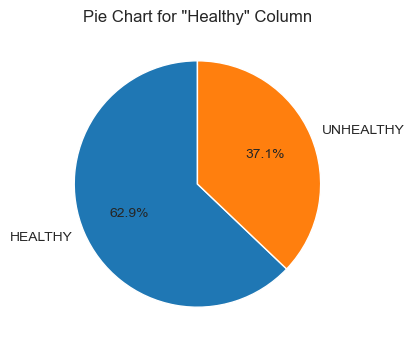

In [11]:
plt.figure(figsize=(4, 4))
LABELS_MAP = {
    1: "HEALTHY",
    0: "UNHEALTHY"
}
plt.pie(train_data['Healthy'].value_counts(), labels = [LABELS_MAP[i] for i in train_data['Healthy'].value_counts().index] , autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for "Healthy" Column')
plt.show()

#### OBSERVATIONS
-   "Healthy" has good distribution

In [12]:
train_data['Food preference'].value_counts()

Food preference
DX6                     9639
DX5                     2167
DX2                     2128
DX4                     2099
DX3                     2072
DX1                     2063
DX1 DX2                  480
DX2 DX4                  476
DX3 DX4                  471
DX1 DX3                  461
DX4 DX5                  459
DX2 DX5                  459
DX2 DX3                  452
DX1 DX5                  450
DX3 DX5                  443
DX1 DX4                  437
DX1 DX2 DX5              116
DX1 DX3 DX4              113
DX1 DX2 DX3              110
DX1 DX2 DX4              110
DX3 DX4 DX5              109
DX2 DX3 DX5              105
DX1 DX3 DX5               98
DX2 DX4 DX5               98
DX2 DX3 DX4               90
DX1 DX4 DX5               89
DX1 DX3 DX4 DX5           27
DX2 DX3 DX4 DX5           26
DX1 DX2 DX4 DX5           23
DX1 DX2 DX3 DX4           20
DX1 DX2 DX3 DX5           16
DX1 DX2 DX3 DX4 DX5        4
Name: count, dtype: int64

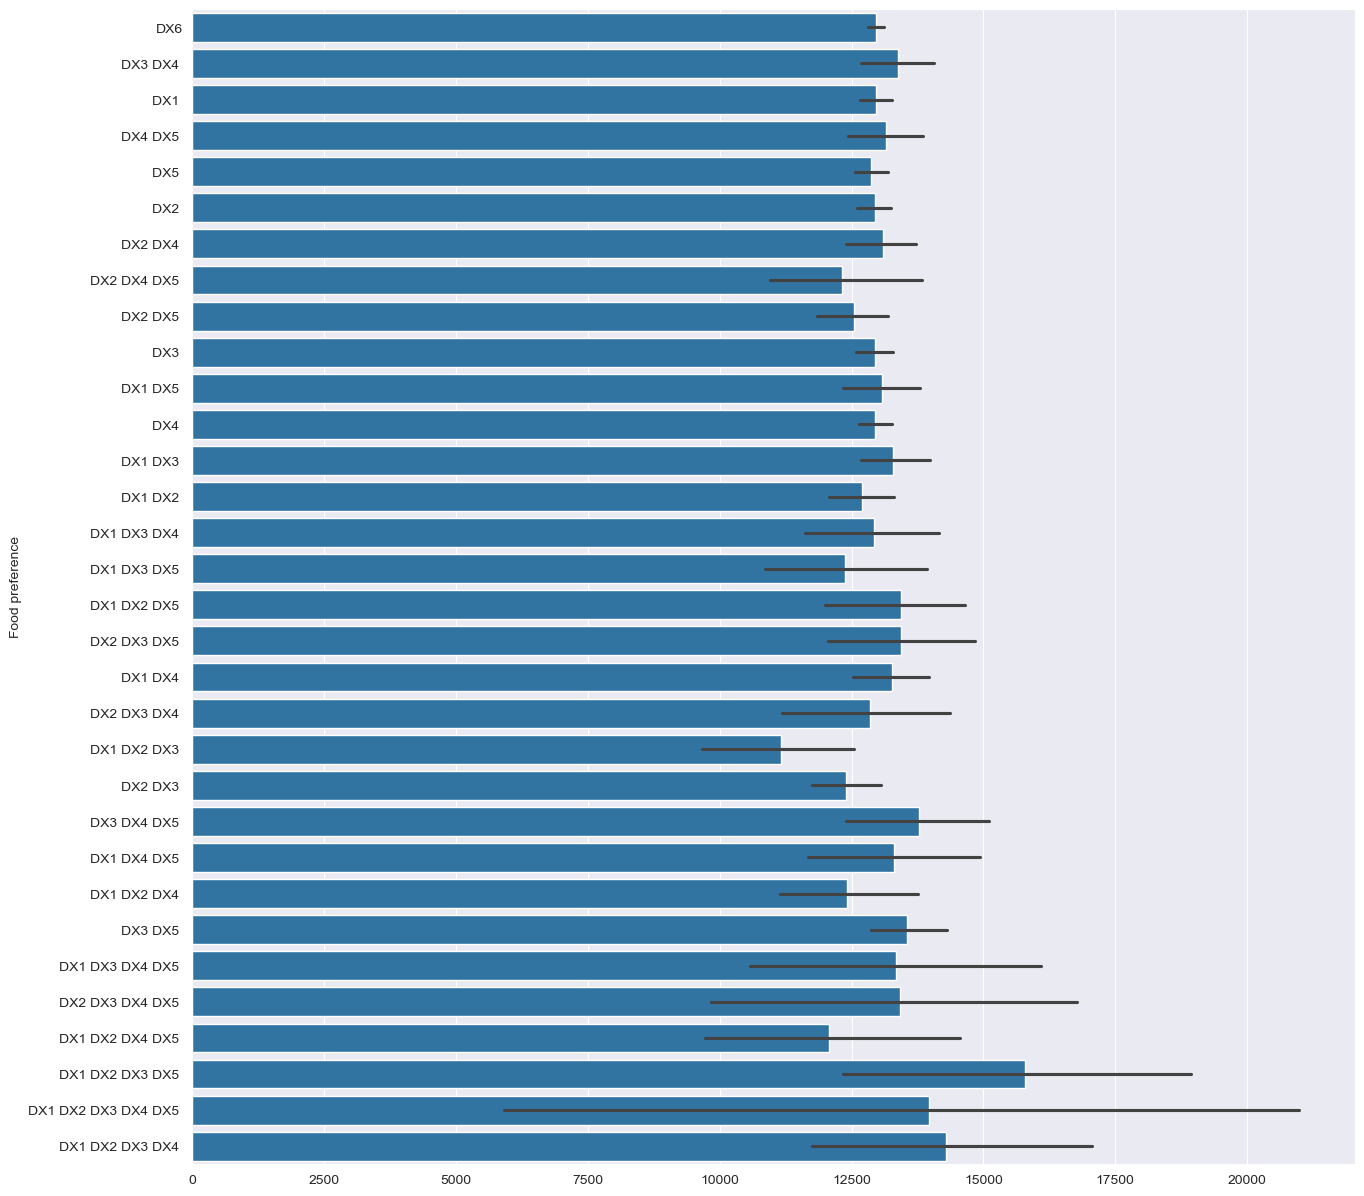

In [13]:
plt.figure(figsize=(15,15))
sns.barplot(train_data['Food preference'])
plt.show()

#### OBSERVATIONS
-   'Food preference' is a combination of food categories ['DX1','DX2','DX3','DX4','DX5','DX6']
-   DX6 is not combined with any other food category

In [14]:
train_data['Smoker?'].value_counts()

Smoker?
NO            14938
YES           10972
Cannot say       10
Name: count, dtype: int64

In [15]:
train_data['Living in?'].value_counts()

Living in?
RURAL    18080
URBAN     7840
Name: count, dtype: int64

## Detecting Outliers

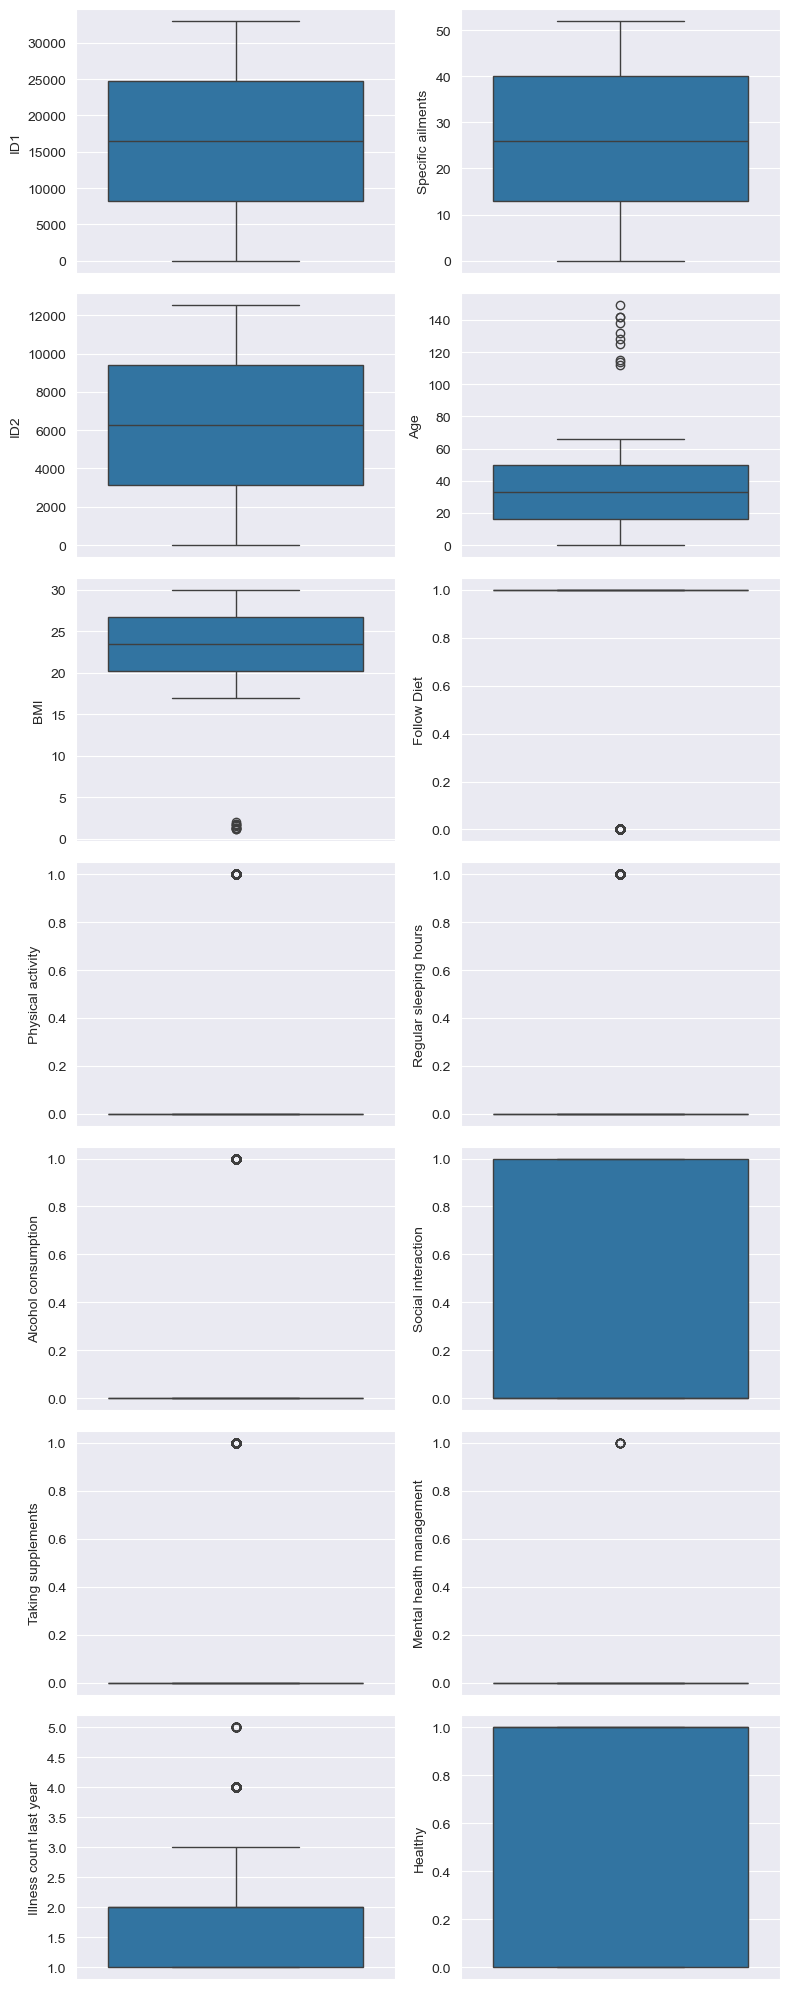

In [16]:
fig,axes = plt.subplots(nrows=int(len(numerical_columns)/2),ncols=2,figsize=(8,20))
for i,col in enumerate(numerical_columns):
    sns.boxplot(data = train_data[col],ax=axes[int(i/2),i%2])
    
plt.tight_layout()

#### OBSERVATIONS
- Age, BMI, Illness count last year have outliers
- BMI<5 is not possible - wrong data
- Age>100 might be possible but since most of the values are below 80, it looks like wrong data
- Illness count last year - it is possible to have values above 3 
          

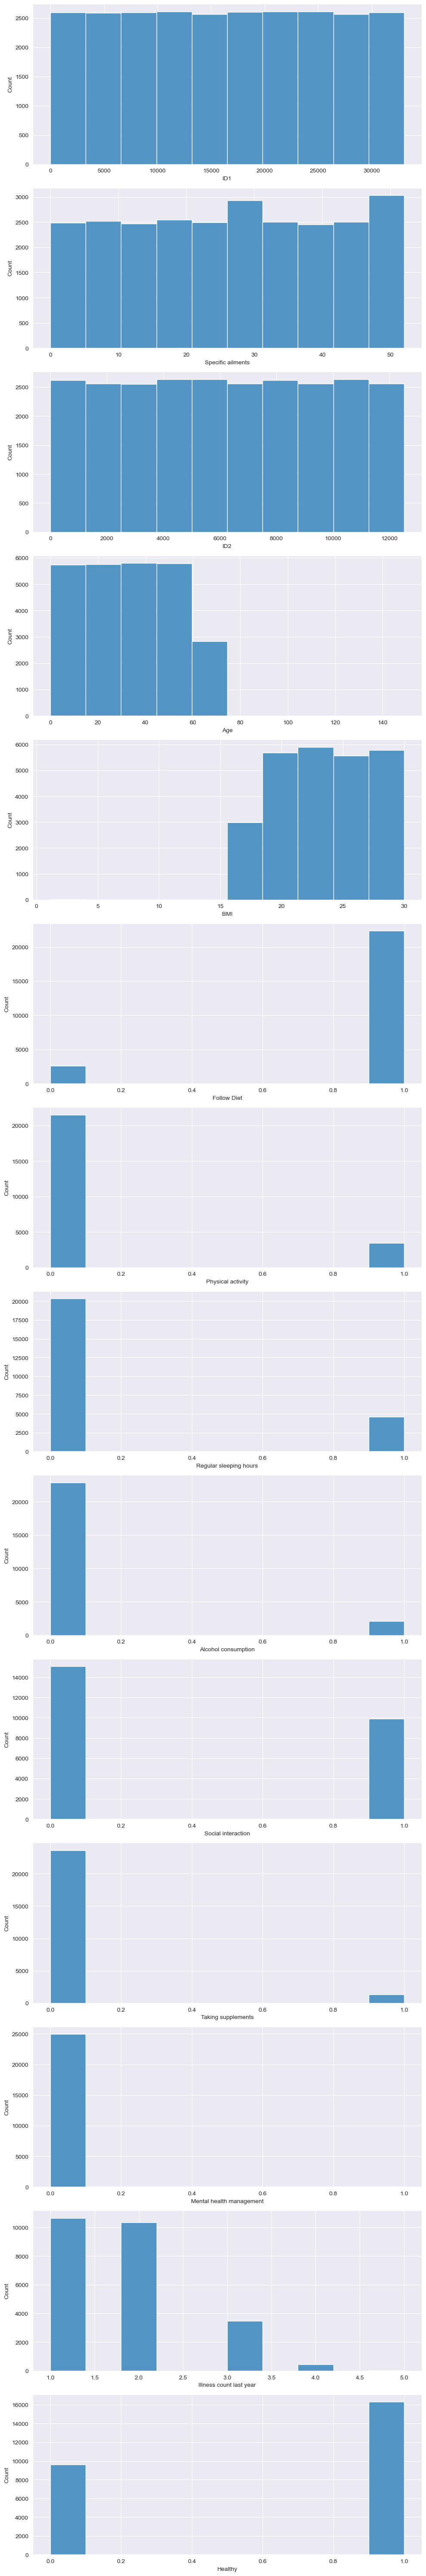

In [17]:
fig,axes = plt.subplots(nrows=len(numerical_columns),figsize=(10,60))
for i,col in enumerate(numerical_columns):
    sns.histplot(train_data,x=col,bins=10,ax=axes[i])
    
plt.tight_layout()

#### OBSERVATIONS
-   some numerical columns does not have continuous distribution

In [18]:
for col in numerical_columns:
    print(col,train_data[col].nunique())

ID1 25920
Specific ailments 53
ID2 10941
Age 76
BMI 10941
Follow Diet 2
Physical activity 2
Regular sleeping hours 2
Alcohol consumption 2
Social interaction 2
Taking supplements 2
Mental health management 2
Illness count last year 5
Healthy 2


In [19]:
num_cols_with_less_num_unique_cols = []
for col in numerical_columns:
    if(train_data[col].nunique()<6):
        num_cols_with_less_num_unique_cols.append(col)
        
print(num_cols_with_less_num_unique_cols)

['Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Taking supplements', 'Mental health management', 'Illness count last year', 'Healthy']


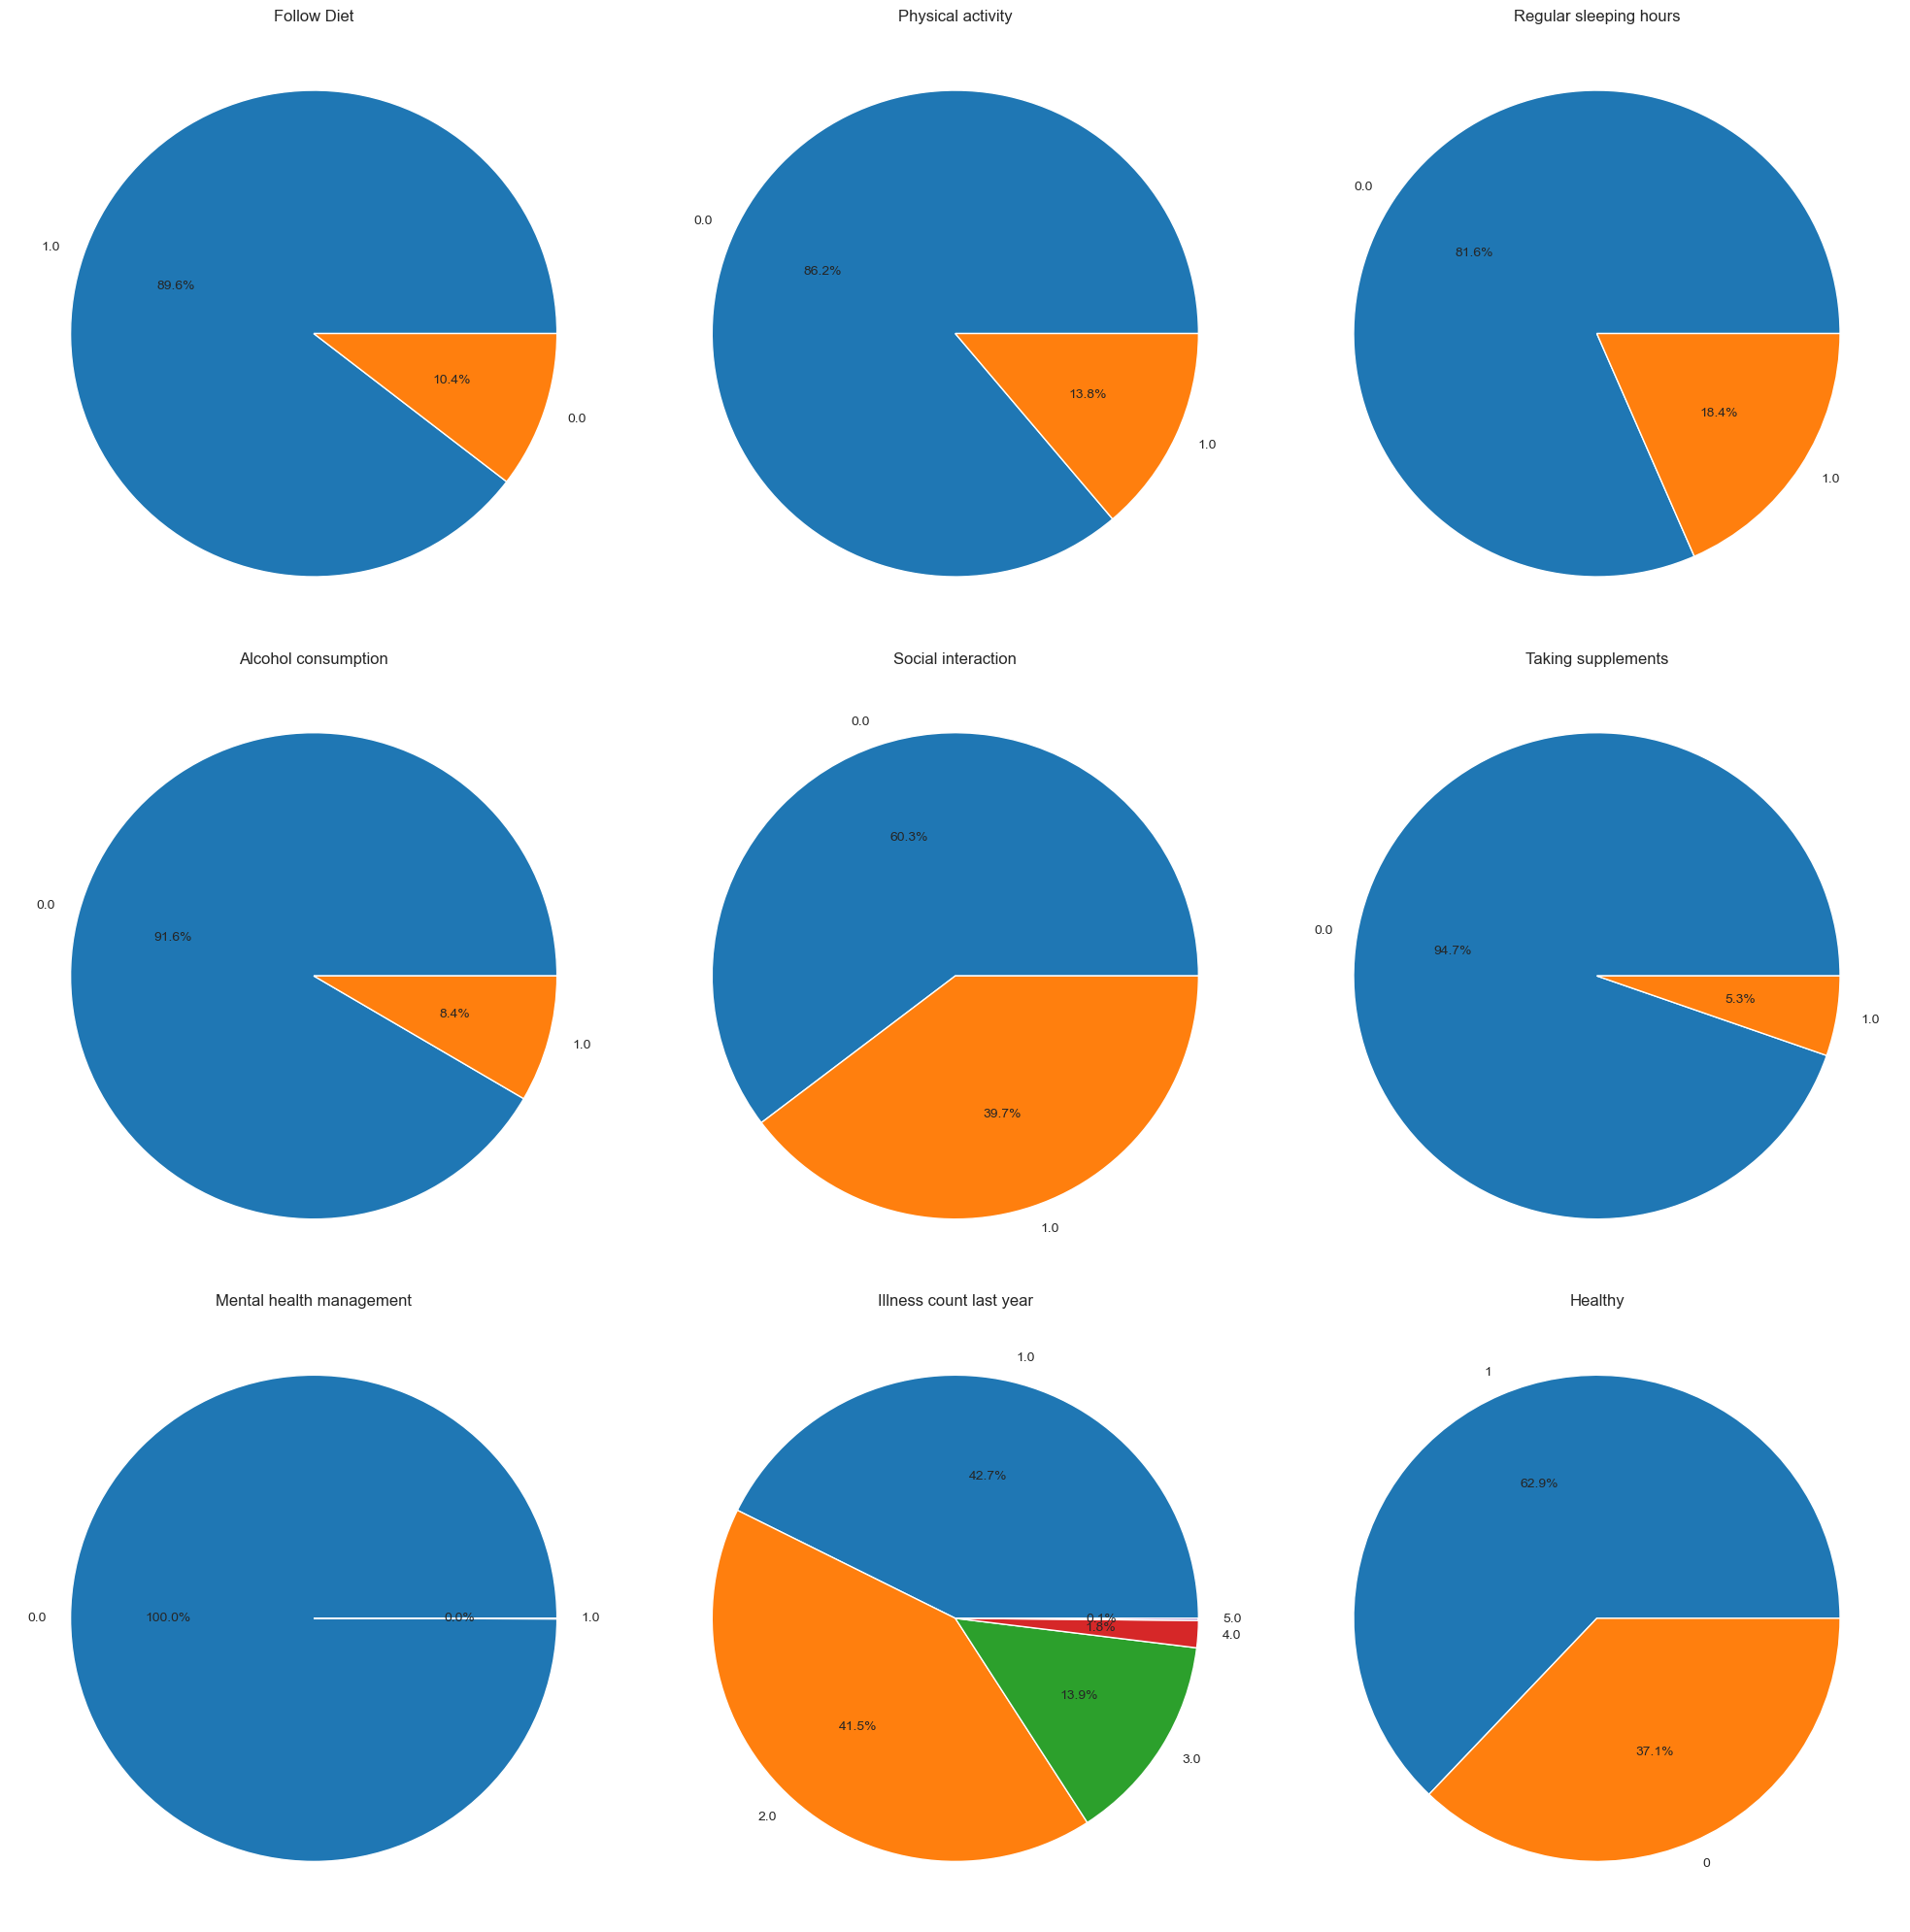

In [20]:
fig, axes = plt.subplots(nrows=int(len(num_cols_with_less_num_unique_cols)/3),ncols=3,figsize=(20,20))
axes = axes.flatten()
for i,col in enumerate(num_cols_with_less_num_unique_cols):
    axes[i].pie(train_data[col].value_counts(),labels=train_data[col].value_counts().index,autopct='%1.1f%%')
    axes[i].set_title(col)
plt.tight_layout()

#### OBSERVATIONS
-   Mental health management ~100% of values are same,not useful for predictions

In [21]:
train_data['Mental health management'].value_counts()

Mental health management
0.0    24937
1.0       10
Name: count, dtype: int64

<Axes: >

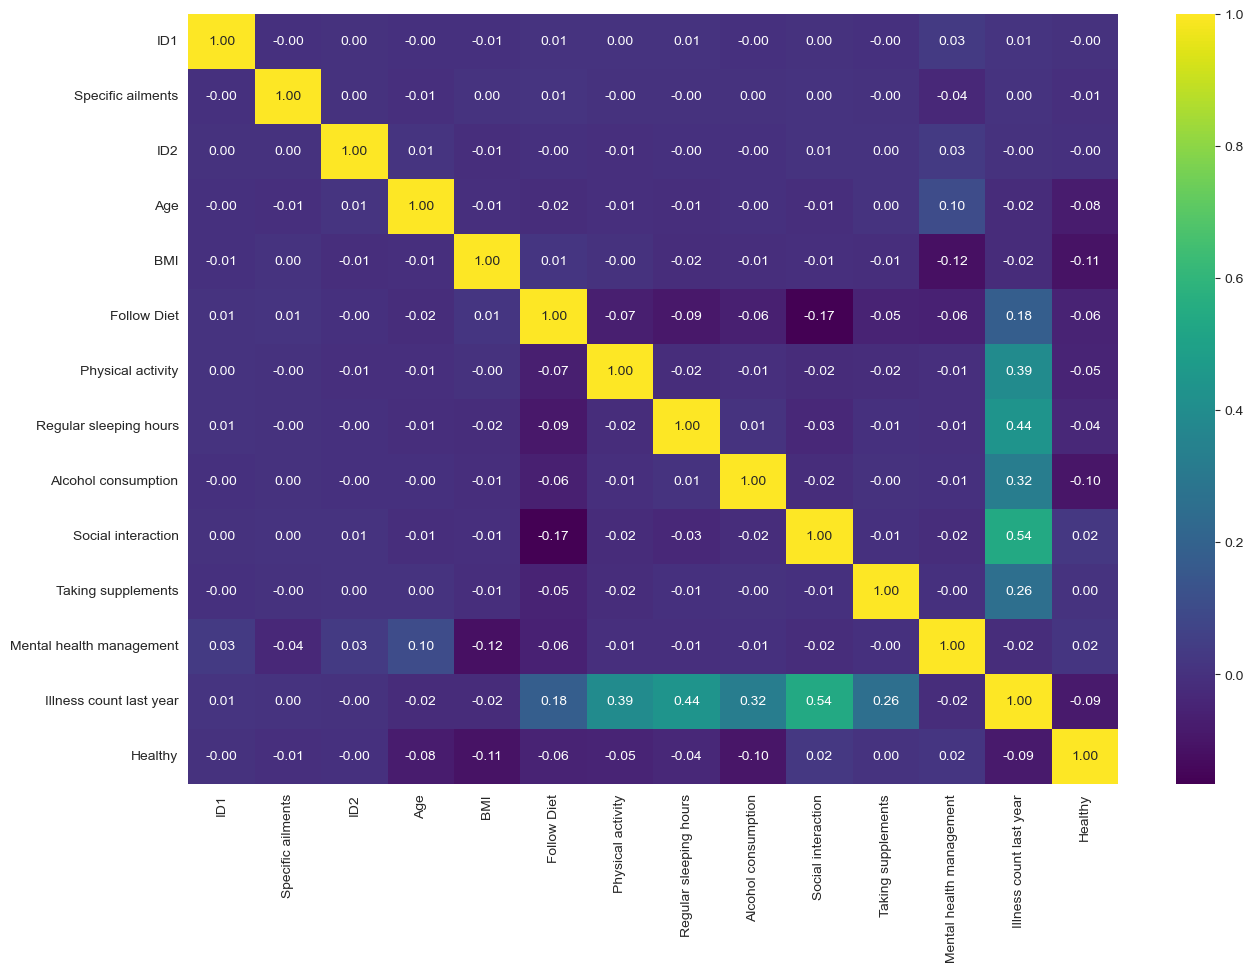

In [22]:
corr = train_data[numerical_columns].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='viridis',annot=True,fmt='.2f')

#### OBSERVATIONS
-   'ID1' , 'ID2' ,'Taking supplements' has 0 correlation with 'Healthy' , we can drop these columns

# Data Preprocessing

In [23]:
train_data_cp = train_data.copy()

In [24]:
train_data_cp[train_data_cp['Age']>100]

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
1112,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
1699,33005,0,12506,NaN,125,1.2581,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2922,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
9531,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10804,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
11646,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
13476,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
15309,33002,0,12503,NaN,115,1.8199,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
17728,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
19900,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [25]:
train_data_cp.drop(train_data_cp[train_data_cp['Age']>100].index,inplace=True)

In [26]:
train_data_cp[train_data_cp['BMI']<10]

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy


In [27]:
train_data_cp['Any heriditary condition?'].value_counts()

Any heriditary condition?
Stable    25910
Name: count, dtype: int64

In [28]:
train_data_cp['Mental health management'].value_counts()

Mental health management
0.0    24937
Name: count, dtype: int64

In [29]:
train_data_cp.drop(['ID1','ID2','Taking supplements','Any heriditary condition?','Mental health management'],axis=1,inplace=True)

In [30]:
food_cats = ['DX1','DX2','DX3','DX4','DX5','DX6']
for cat in food_cats:
    train_data_cp[cat] = train_data_cp['Food preference'].apply(lambda x:1 if cat in x else 0)

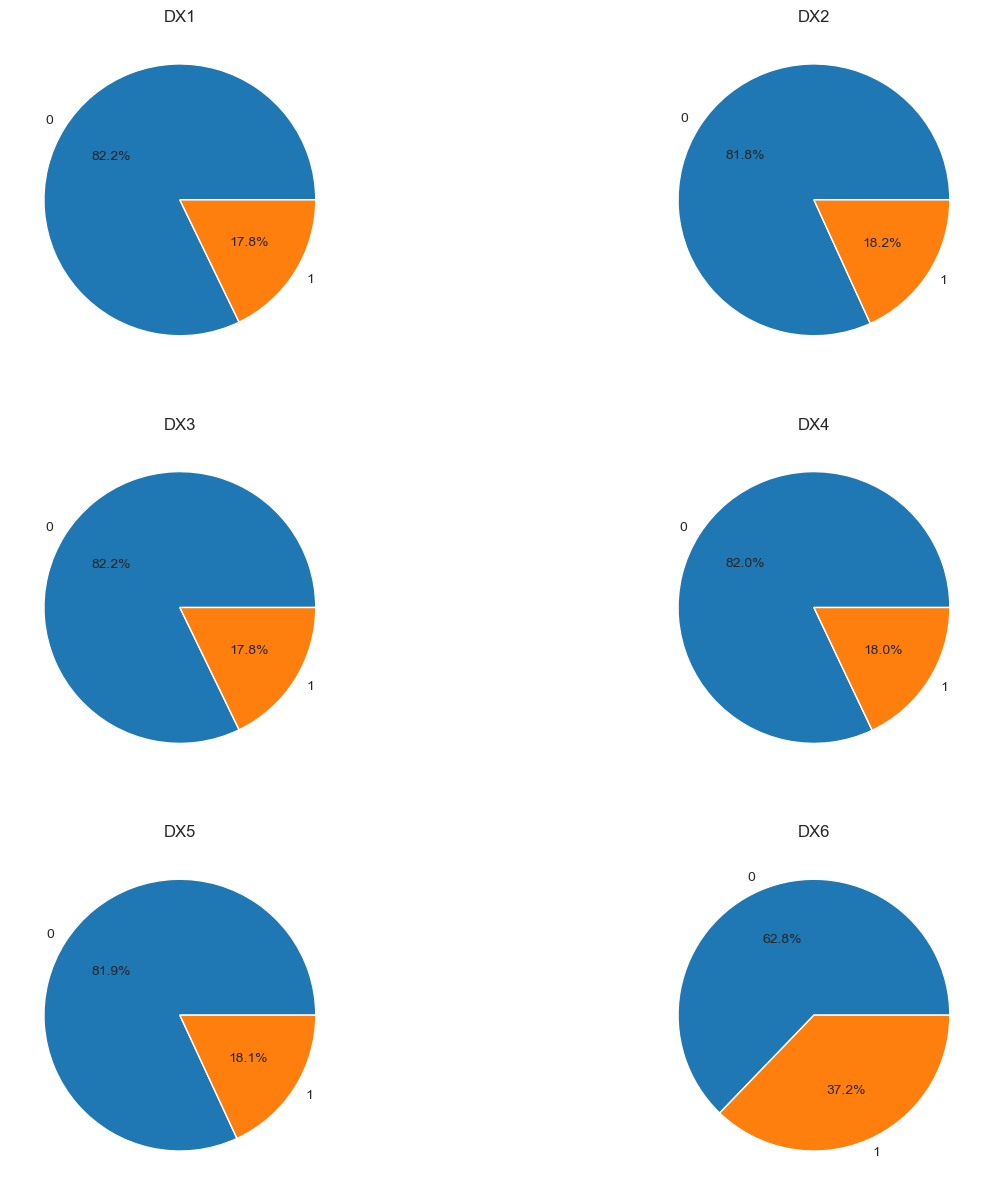

In [31]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(15,15))
axes = axes.flatten()
for i,cat in enumerate(food_cats):
    axes[i].pie(train_data_cp[cat].value_counts(),labels=train_data_cp[cat].value_counts().index,autopct='%1.1f%%')
    axes[i].set_title(cat)

In [32]:
train_data_cp.drop(['Food preference','DX6'],inplace=True,axis=1)

In [33]:
train_data_cp['Smoker?'].replace({'YES':1,'NO':0},inplace=True)
train_data_cp['Living in?'].replace({'RURAL':1,'URBAN':0},inplace=True)

In [34]:
train_data_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25910 entries, 0 to 25919
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Specific ailments        25910 non-null  int64  
 1   Age                      25910 non-null  int64  
 2   BMI                      25910 non-null  float64
 3   Smoker?                  25910 non-null  int64  
 4   Living in?               25910 non-null  int64  
 5   Follow Diet              24937 non-null  float64
 6   Physical activity        24937 non-null  float64
 7   Regular sleeping hours   24937 non-null  float64
 8   Alcohol consumption      24937 non-null  float64
 9   Social interaction       24937 non-null  float64
 10  Illness count last year  24937 non-null  float64
 11  Healthy                  25910 non-null  int64  
 12  DX1                      25910 non-null  int64  
 13  DX2                      25910 non-null  int64  
 14  DX3                      25

<Axes: >

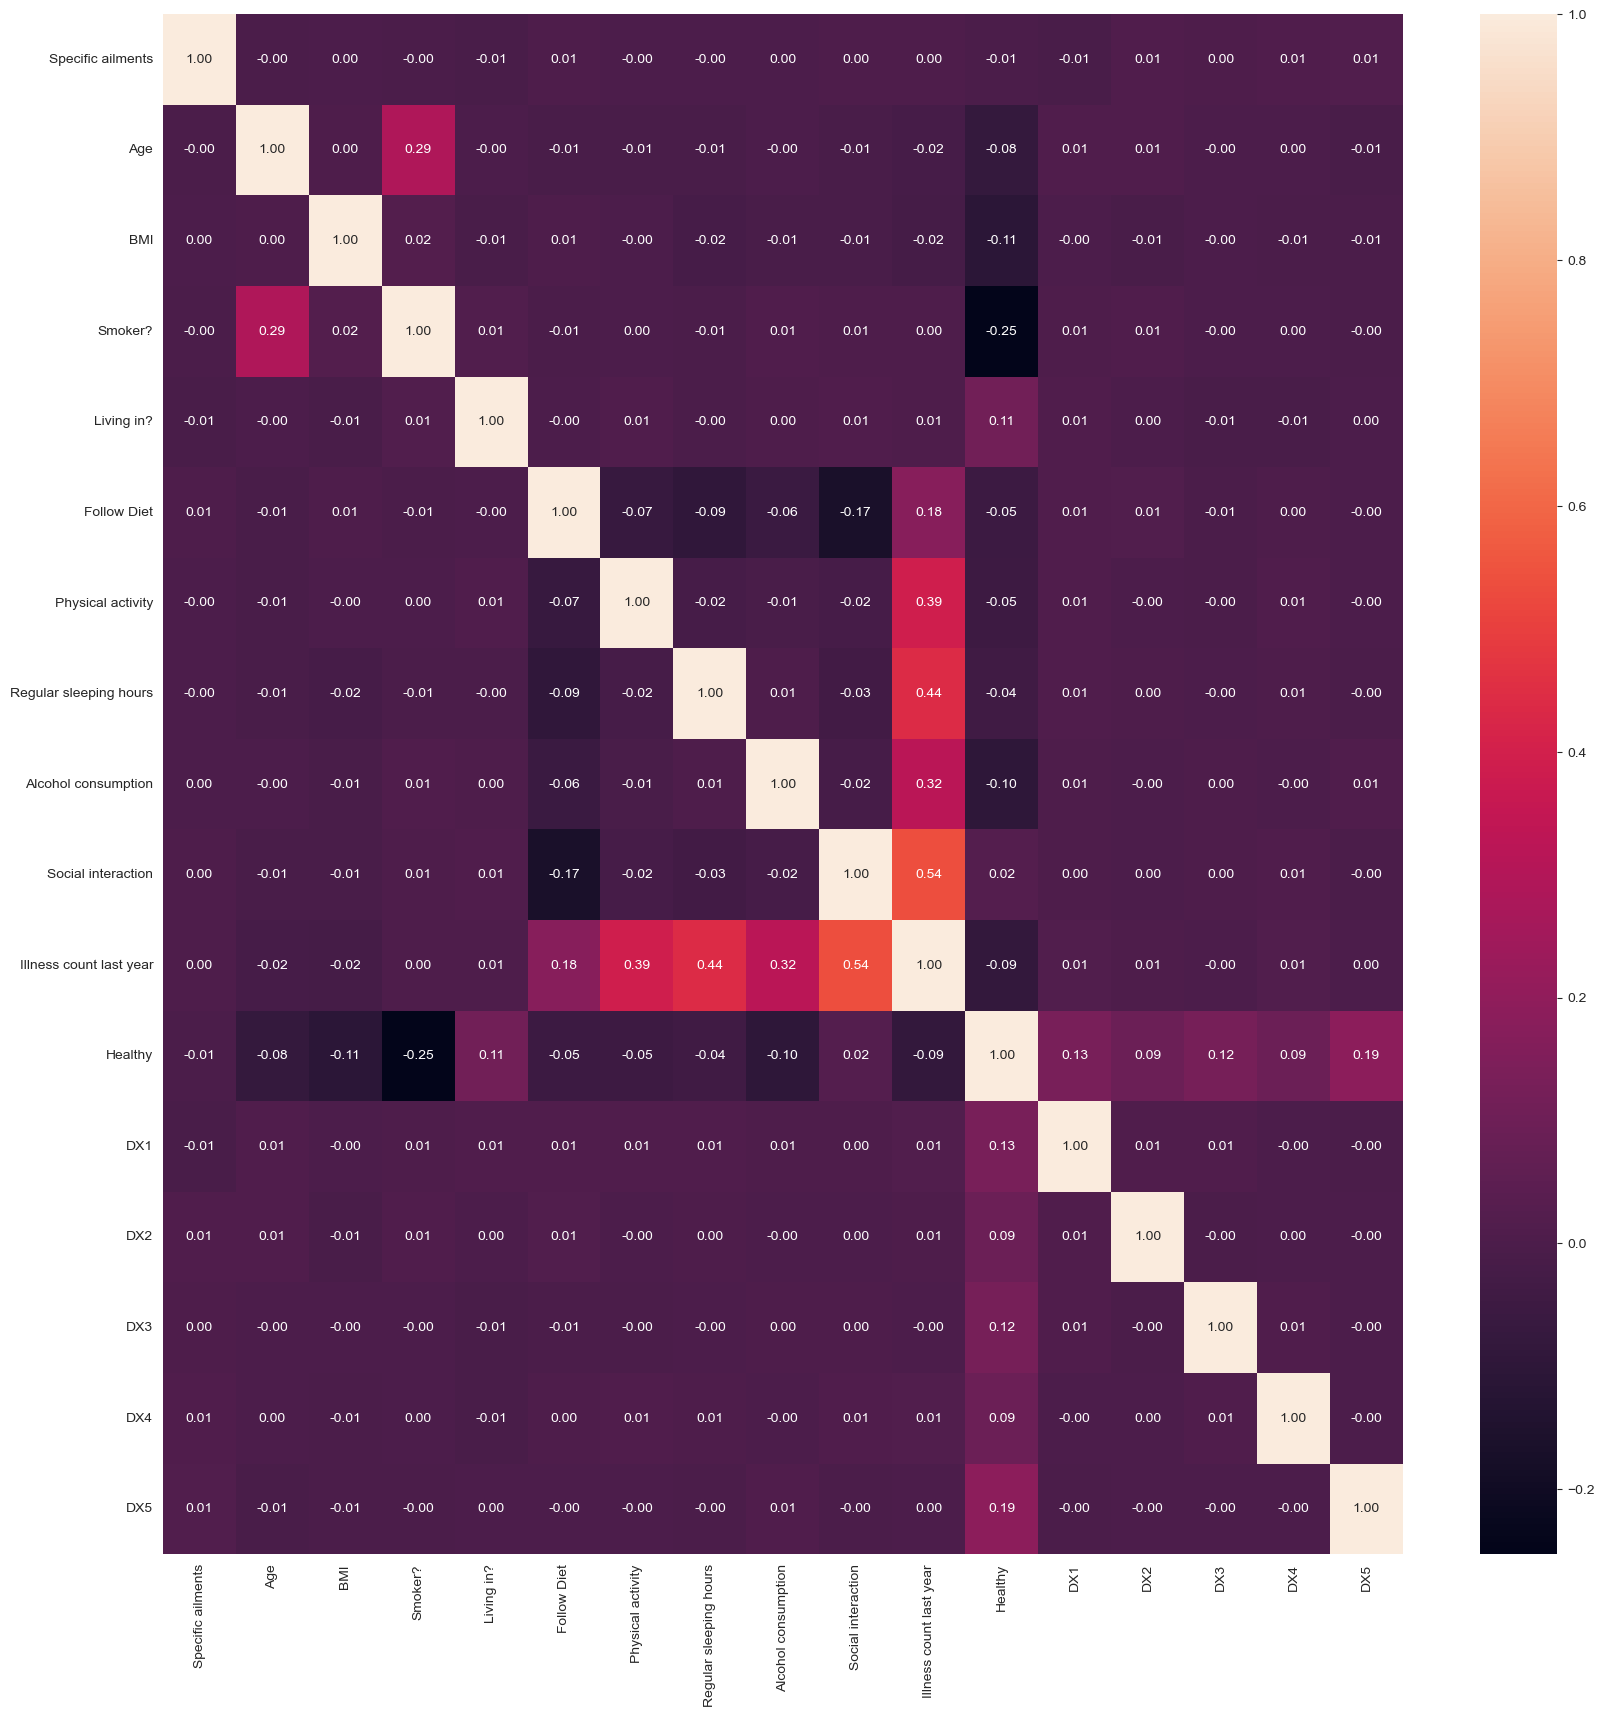

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data_cp.corr(),annot=True,fmt='.2f')

In [36]:
Y = train_data_cp.Healthy
X = train_data_cp.drop('Healthy',axis=1)
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.25,random_state=1)

#### HYPERPARAMETER TUNING

##### XG Boost
-   can handle missing values

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#model = XGBClassifier(n_estimators=375,learning_rate=0.1,max_depth=3,min_child_weight=1,objective='binary:logistic',eval_metric='error')
model = XGBClassifier(objective='binary:logistic',eval_metric='error')
param_grid = {
    'n_estimators':[50,100,150,200,250,300,350,400],
    'learning_rate':[0.01,0.05,0.1,0.15],
    'max_depth':[3,5,7],
    'min_child_weight':[1,3,5],
    'subsample':[0.8,1.0]
}
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=metrics.make_scorer(metrics.f1_score),cv=3,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print(best_params)

{'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}


In [38]:
best_model = grid.best_estimator_
print("Validation Data:")
y_val_pred = best_model.predict(x_val)
print(metrics.f1_score(y_val,y_val_pred))
matrix = metrics.confusion_matrix(y_val, y_val_pred)
matrix = np.flip(matrix)   
print("Confusion Matrix: \n", matrix)
print("Training Data:")
y_train_pred = best_model.predict(x_train)
print(metrics.f1_score(y_train,y_train_pred))
matrix = metrics.confusion_matrix(y_train, y_train_pred)
matrix = np.flip(matrix)   
print("Confusion Matrix: \n", matrix)

Validation Data:
0.8813314037626628
Confusion Matrix: 
 [[3654  427]
 [ 557 1840]]
Training Data:
0.8995929443690638
Confusion Matrix: 
 [[11271   938]
 [ 1578  5645]]


In [39]:
feature_imp = best_model.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature':x_train.columns,
    'Importance':feature_imp
    }
)
feature_imp_df.sort_values(by='Importance',inplace=True,ascending=False)
print(feature_imp_df)

                    Feature  Importance
3                   Smoker?    0.140580
15                      DX5    0.103476
13                      DX3    0.074148
4                Living in?    0.070499
11                      DX1    0.069921
8       Alcohol consumption    0.066929
12                      DX2    0.065851
14                      DX4    0.064473
5               Follow Diet    0.059285
2                       BMI    0.056930
0         Specific ailments    0.053089
7    Regular sleeping hours    0.049428
6         Physical activity    0.044443
1                       Age    0.040614
10  Illness count last year    0.024346
9        Social interaction    0.015988


##### Random Forest Classifier

In [40]:
train_data_rfc = train_data_cp.dropna()
Y_rfc = train_data_rfc.Healthy
X_rfc = train_data_rfc.drop('Healthy',axis=1)
from sklearn.model_selection import train_test_split
x_train_rfc,x_val_rfc,y_train_rfc,y_val_rfc = train_test_split(X_rfc,Y_rfc,test_size=0.25,random_state=1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
param_grid_rfc = {
    'n_estimators': [50, 100],
    'max_depth': [ 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [6,8]
}
grid_rfc = GridSearchCV(estimator=model_rfc,param_grid=param_grid_rfc,cv=3,n_jobs=-1,scoring=metrics.make_scorer(metrics.f1_score))
grid_rfc.fit(x_train_rfc,y_train_rfc)
best_params_rfc = grid_rfc.best_params_
print(best_params_rfc)

{'max_depth': 8, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [42]:
best_model_rfc = grid_rfc.best_estimator_
print("Validation Data:")
y_val_pred_rfc = best_model_rfc.predict(x_val_rfc)
print(metrics.f1_score(y_val_rfc,y_val_pred_rfc))
matrix = metrics.confusion_matrix(y_val_rfc, y_val_pred_rfc)
matrix = np.flip(matrix)   
print("Confusion Matrix: \n", matrix)
print("Training Data:")
y_train_pred_rfc = best_model_rfc.predict(x_train_rfc)
print(metrics.f1_score(y_train_rfc,y_train_pred_rfc))
matrix = metrics.confusion_matrix(y_train_rfc, y_train_pred_rfc)
matrix = np.flip(matrix)   
print("Confusion Matrix: \n", matrix)

Validation Data:
0.8530794262986621
Confusion Matrix: 
 [[3539  322]
 [ 897 1477]]
Training Data:
0.8670299510759318
Confusion Matrix: 
 [[10899   784]
 [ 2559  4460]]


#### OBSERVATIONS
-   XGBoost classifier model performed better than random forest classifier